# Import Libraries

In [1]:
# Core
import pandas as pd
import numpy as np
import sklearn
import math

# Preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer


# Models - Regresión
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Funciones

Funcion reemplazar NA

In [8]:
def reemplazar_nulos(dataframe, estrategia, columnas):

  if(estrategia in ['mean', 'median', 'most_frequent']):
    imputer = SimpleImputer(missing_values = np.nan, strategy = estrategia)
    imputer. fit(dataframe[columnas])

    dataframe[columnas] = imputer.transform(dataframe[columnas])
  else:
    raise Exception("Estrategia Invalida")



def reemplazar_nulos_constante(dataframe, columnas, constante):

    imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value= constante)
    imputer. fit(dataframe[columnas])

    dataframe[columnas] = imputer.transform(dataframe[columnas])

Funcion Matrix de Correlacion

In [12]:
def correlacion_matrix(data, column, porcentajeCorrelacion):
  corr_matrix = data.corr()

  top_corr_features = corr_matrix.index[abs(corr_matrix[column]) >= porcentajeCorrelacion]


  plt.figure(figsize=(10, 6))
  sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="coolwarm")

  plt.title(f'Matriz de Correlación de las Variables mas correlacionadas con {column}')
  plt.show()


Funcion Split Data

In [20]:
def splitData(dataframe, columnY):
  X = dataframe.drop([columnY], axis = 1)
  y = dataframe[columnY]

  return X, y


def trainTest(X, y, testSize, randomState):
  X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = testSize, random_state = randomState)

  return X_train, X_test, y_train, y_test

# Load Dataset

In [4]:
data = pd.read_csv('../data/epi_r.csv')
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [6]:
data.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

# Limpieza de datos

In [9]:
columnas = data.columns.tolist()

reemplazar_nulos_constante(data, columnas, 0)

In [10]:
data = data.drop('title', axis=1)

In [11]:
data.head()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.5,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.75,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Matriz de Correlacion


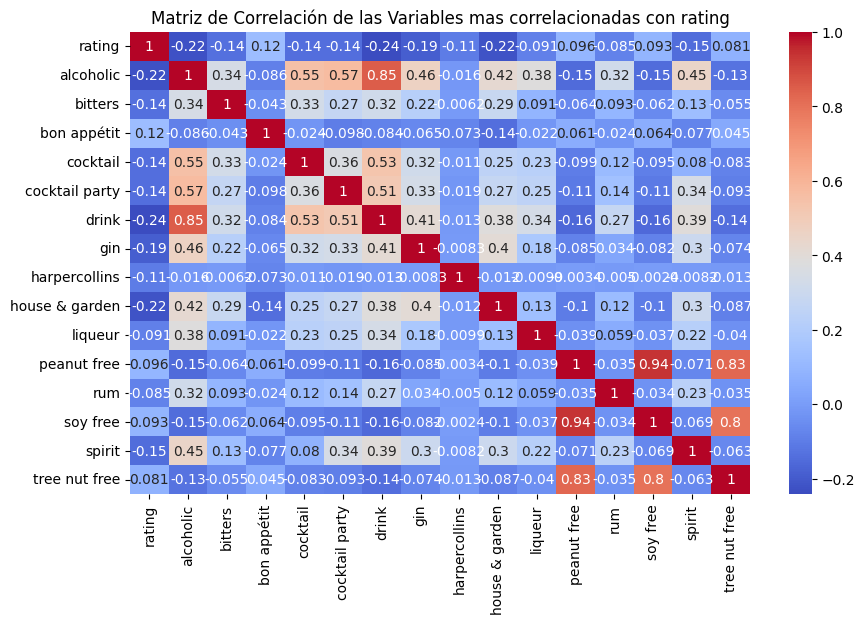

In [19]:
correlacion_matrix(data, 'rating', 0.08)

# Split Data Train test

In [124]:
X, y = splitData(data, 'rating')

In [125]:
X_train, X_test, y_train, y_test = trainTest(X, y, 0.1, 42)

In [126]:
sc= StandardScaler()

X_train_sc= sc.fit_transform(X_train)

X_test_sc= sc.transform(X_test)

## Ramdom Forest para elegir las variables mas importantes

In [127]:
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train_sc, y_train)
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance'])
selected_features = feature_importances[feature_importances['importance'] > 0.005].index.tolist()

In [128]:
selected_features

['calories',
 'protein',
 'fat',
 'sodium',
 'bake',
 'bon appétit',
 'cocktail',
 'condiment',
 'drink',
 'fall',
 'gourmet',
 'harpercollins',
 'healthy',
 'house & garden',
 'kid-friendly',
 'quick & easy',
 'sauce',
 'summer',
 'vegetarian']

In [129]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [130]:
sc= StandardScaler()

X_train_sc= sc.fit_transform(X_train)

X_test_sc= sc.transform(X_test)

In [131]:
regressor = LinearRegression()
regressor.fit(X_train_sc, y_train)

LinearRegression()

In [132]:
y_pred = regressor.predict(X_test_sc)

In [133]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 1.7081257186251204
Error absoluto medio (MAE): 0.8954553392391357
Coeficiente de determinación (R^2): 0.06116175044985439


In [134]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [135]:
print("Coeficiente de determinación (R^2) ajustado:", adjusted_r2(r2, len(X_test), len(feature_importances)))

Coeficiente de determinación (R^2) ajustado: -0.4185159686119382


### Conclusión

En el análisis de regresión llevado a cabo para predecir el rating de recetas en función de las características nutricionales y otras características categóricas incluidas en las columnas ['calories', 'protein', 'fat', 'sodium', 'bake', 'bon appétit', 'cocktail', 'condiment', 'drink', 'fall', 'gourmet', 'harpercollins', 'healthy', 'house & garden', 'kid-friendly', 'quick & easy', 'sauce', 'summer', 'vegetarian'], se utilizó un sistema de importancia de características calculado con un modelo de Random Forest para seleccionar las variables más relevantes. Sin embargo, a pesar de esta selección basada en la importancia de las características, el coeficiente \( R^2 \) ajustado resultó ser negativo. Este resultado indica que ninguna de las variables del conjunto de datos, ni siquiera las seleccionadas como las más importantes por el Random Forest, explican adecuadamente la varianza en los ratings de las recetas.

Un \( R^2 \) ajustado negativo sugiere que el modelo de regresión no solo no mejora la predicción del rating comparado con la media del rating, sino que en realidad es peor que un modelo que no utiliza ninguna de las variables predictoras. En términos prácticos, esto implica que las características nutricionales y categóricas seleccionadas, y posiblemente ninguna de las variables en el conjunto de datos, son buenos predictores del rating de las recetas. Para mejorar la capacidad predictiva del modelo, se debería considerar la incorporación de otras variables no presentes en el conjunto actual o métodos de modelado alternativos que puedan captar relaciones más complejas.

Es decir las personas al hacer una review de una receta no tienen en cuenta las características nutricionales a la hora de calificarla